Implement  Linear regression to predict house prices based on multiple variables using regularization techniques and explain how regularisation overcome overfitting problem. (use inbuilt dataset boston-  from sklearn.datasets import load_boston)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression

In [71]:
boston = fetch_openml("boston", version=1)
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [72]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [73]:
boston.target_names

['MEDV']

Text(0.5, 1.0, 'Price vs RM')

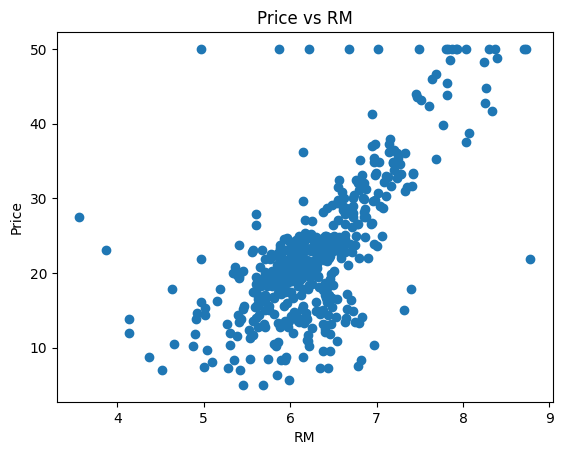

In [74]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

%matplotlib inline
plt.scatter(df['RM'], boston.target)
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Price vs RM')

In [75]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [76]:
df.drop(["CHAS"], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [77]:
df[boston.target_names[0]] = boston.target # adds target variable to data frame
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [78]:
df.isna().any() # checks for any missing values

CRIM       False
ZN         False
INDUS      False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [79]:
X = df.drop(boston.target_names[0], axis=1) # input features
y = df[boston.target_names[0]] # target variable 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
x_train = x_train.apply(pd.to_numeric, errors="coerce")
y_train = y_train.apply(pd.to_numeric, errors="coerce")
x_test = x_test.apply(pd.to_numeric, errors="coerce")
y_test = y_test.apply(pd.to_numeric, errors="coerce")

In [81]:
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)
x_test = x_test.fillna(0)
y_test = y_test.fillna(0)

L1 Regularized: Lasso And L2 Regularized: Ridge

In [82]:
model_lasso = Lasso(alpha=0.1, max_iter=100, tol=0.1)
model_ridge = Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [83]:
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=100, tol=0.1)

In [84]:
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [85]:
model_lasso.score(x_train, y_train)

0.7595660448284873

In [86]:
model_lasso.score(x_test, y_test)

0.5504952555432573

In [87]:
model_ridge.score(x_train, y_train)

0.7690377183320597

In [88]:
model_ridge.score(x_test, y_test)

0.5788874995698601

Normal Linear Regression

In [89]:
model_lr = LinearRegression().fit(x_train, y_train)

In [90]:
model_lr.score(x_train, y_train)

0.7690953567794605

In [91]:
model_lr.score(x_test, y_test)

0.5798488471389431